In [13]:
!python train.py --name unet_300 --epochs 300 --batch_size 16 --arch NestedUNet --num_classes 3 --dataset unet_data

--------------------
name: unet_300
epochs: 300
batch_size: 16
arch: NestedUNet
deep_supervision: False
input_channels: 3
num_classes: 3
input_w: 96
input_h: 96
loss: BCEDiceLoss
dataset: unet_data
img_ext: .png
mask_ext: .png
optimizer: SGD
lr: 0.001
momentum: 0.9
weight_decay: 0.0001
nesterov: False
scheduler: CosineAnnealingLR
min_lr: 1e-05
factor: 0.1
patience: 2
milestones: 1,2
gamma: 0.6666666666666666
early_stopping: -1
num_workers: 4
--------------------
=> creating model NestedUNet


Traceback (most recent call last):
  File "c:\Users\buslab\Desktop\wanyihan\DIP_project\pytorch-nested-unet\train.py", line 354, in <module>
    main()
  File "c:\Users\buslab\Desktop\wanyihan\DIP_project\pytorch-nested-unet\train.py", line 250, in main
    train_img_ids, val_img_ids = train_test_split(img_ids, test_size=0.2, random_state=41)
  File "c:\Users\buslab\AppData\Local\miniconda3\envs\yolov7\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\buslab\AppData\Local\miniconda3\envs\yolov7\lib\site-packages\sklearn\model_selection\_split.py", line 2617, in train_test_split
    n_train, n_test = _validate_shuffle_split(
  File "c:\Users\buslab\AppData\Local\miniconda3\envs\yolov7\lib\site-packages\sklearn\model_selection\_split.py", line 2273, in _validate_shuffle_split
    raise ValueError(
ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

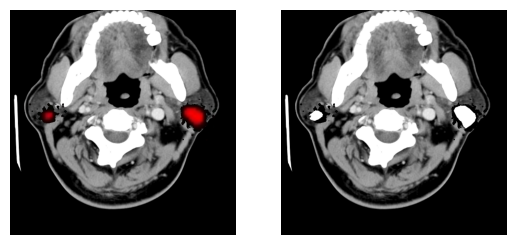

In [39]:
original_image = cv2.imread('./output_dir_test/images/b58-15991078_11.png')
segmentation_result = cv2.imread('./pytorch-nested-unet/outputs/unet_300/test/2/b58-15991078_11.jpg')
GT_mask = cv2.imread('./output_dir_test/masks/2/b58-15991078_11.png')

resized_segmentation = cv2.resize(segmentation_result, (512, 512), interpolation=cv2.INTER_LINEAR)
# 创建mask，将黑色背景设置为全白（255）
mask = cv2.cvtColor(resized_segmentation, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]
mask = cv2.merge((mask, mask, mask))

G_mask = cv2.cvtColor(GT_mask, cv2.COLOR_BGR2GRAY)
G_mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)[1]

# 将分割结果叠加到原始图像上
result = np.where(mask == 255, resized_segmentation, original_image)

truth = np.where(G_mask == 255, GT_mask, original_image)
plt.subplot(121)
plt.imshow(result)
plt.axis('off')  # 关闭坐标轴
plt.subplot(122)
plt.imshow(truth)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [42]:
original_image = cv2.imread('./output_dir_test/images/b58-15991078_11.png')
segmentation_result = cv2.imread('./pytorch-nested-unet/outputs/unet_300/test/2/b58-15991078_11.jpg')
GT_mask = cv2.imread('./output_dir_test/masks/2/b58-15991078_11.png')

# 调整分割结果尺寸以匹配原始图像
resized_segmentation = cv2.resize(segmentation_result, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_LINEAR)

# 创建 mask
mask = cv2.cvtColor(resized_segmentation, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

G_mask = cv2.cvtColor(GT_mask, cv2.COLOR_BGR2GRAY)
_, G_mask = cv2.threshold(G_mask, 1, 255, cv2.THRESH_BINARY)

# 将掩模转换为三通道图像
mask = cv2.merge((mask, mask, mask))
G_mask = cv2.merge((G_mask, G_mask, G_mask))

# 将两个 mask 叠加到原始图像上
result = original_image.copy()
result[mask == 255] = (0, 0, 255)  # 将 mask 区域设置为红色
result[G_mask == 255] = (0, 255, 0)  # 将 G_mask 区域设置为绿色

# 显示结果
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 14382 output values where the mask is true